In [1]:
%load_ext autoreload  
%autoreload 2  
import os
# BLAS uyarısını susturmak ve Numba'yı aktif etmek için:
os.environ["PYTENSOR_FLAGS"] = "mode=NUMBA"

Data Nesnesi:      minimum_time  minimum_time_error       weights  minimum_type      labels
0    2.454532e+06            0.000015  4.444444e+09             0  Literature
1    2.454533e+06            0.000015  4.444444e+09             0  Literature
2    2.454536e+06            0.000015  4.444444e+09             0  Literature
3    2.454537e+06            0.000015  4.444444e+09             0  Literature
4    2.454555e+06            0.000015  4.444444e+09             0  Literature
..            ...                 ...           ...           ...         ...
465  2.460740e+06            0.000029  1.167229e+09             0    Ždánice 
466  2.460460e+06            0.000028  1.275510e+09             0    Ždánice 
467  2.460069e+06            0.000014  5.102041e+09             0    Ždánice 
468  2.460057e+06            0.000003  1.111111e+11             0    Ždánice 
469  2.460461e+06            0.000003  1.111111e+11             0    Ždánice 

[470 rows x 5 columns]
OCPyMC Nesnesi:      minim

(<Figure size 1000x540 with 1 Axes>, <Axes: xlabel='Cycle', ylabel='O−C'>)

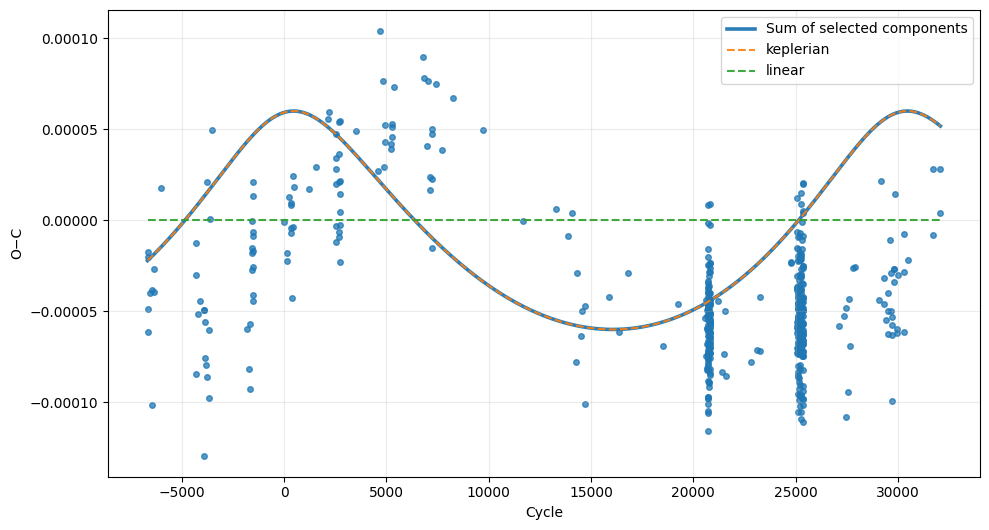

In [ ]:
from ocpy.data import Data
from ocpy.oc import Keplerian, Linear, Parameter
from ocpy.oc_pymc import OCPyMC

excel_path = "DD_CrB_Minima_.xlsx"

from ocpy.data import Data

import pandas as pd
from ocpy.oc import OC  # oc.py dosyasının proje yapınıza göre doğru import edildiğinden emin olun

from ocpy.data import Data

file_path = "dd_crb.csv"

column_mapping = {
    "Mintimes": "minimum_time",    
    "Errors": "minimum_time_error",
    "Mintypes": "minimum_type",     
    "Data_group": "labels"          
}

data = Data.from_file(file_path, columns=column_mapping)

if data.data["minimum_time_error"].notna().all():
    data = data.calculate_weights()

t0 = 2455611.92657 
period = 0.161770446 

oc = data.calculate_oc(
    reference_minimum=t0,
    reference_period=period,
    model_type="pymc"
)

print("Data Nesnesi:", data)
print("OCPyMC Nesnesi:", oc)

kep = Keplerian(
    amp=Parameter(
        value=6e-05,
        std=4e-5,
        min=0.0,
        max=1e-4,
        fixed=False,
    ),
    e=Parameter(
        value=4e-01,
        std=3e-1,
        min=0.0,
        max=0.95,
        fixed=False,
    ),
    omega=Parameter(
        value=8e+01,   # 85.01659 deg
        std=180,
        min=0.0,
        max=360.0,
        fixed=False,
    ),
    P=Parameter(
        value=3e+04,
        std=10000,
        min=10000,
        fixed=False,
    ),
    T0=Parameter(
        value=3e+04,
        std=30000,
        fixed=False,
    ),
)

lin = Linear(
    a=Parameter(
        value=0,
        std=1e-9,
        min=-1e-9,
        fixed=False,
    ),
    b=Parameter(
        value=0,
        std=1e-4,
        min=-1e-4,
        fixed=False,
    ),
)

oc.plot_components_on_data([kep, lin])


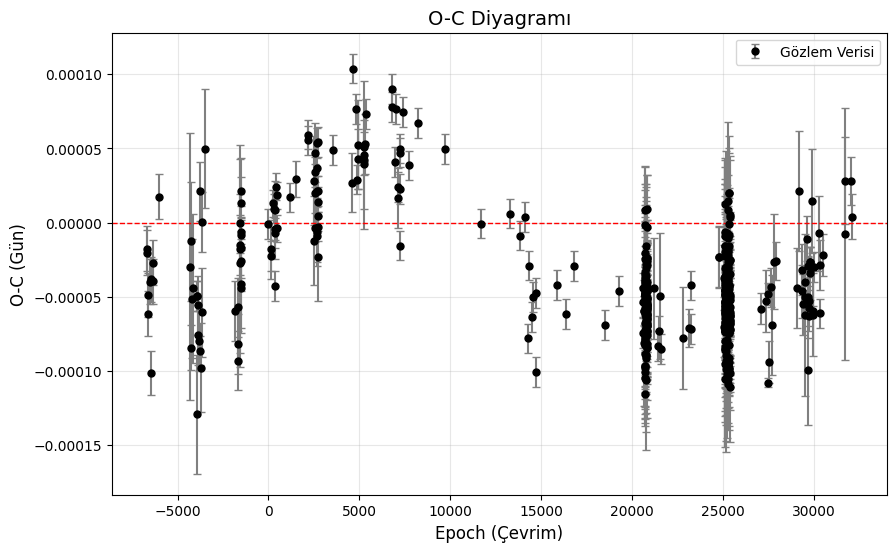

In [ ]:
import matplotlib.pyplot as plt

x = oc.data["cycle"]            
y = oc.data["oc"]                
y_err = oc.data["minimum_time_error"] 

plt.figure(figsize=(10, 6)) 

plt.errorbar(
    x, 
    y, 
    yerr=y_err,    
    fmt='o',     
    color='black', 
    ecolor='gray',  
    markersize=5,   
    capsize=3,     
    label='Gözlem Verisi'
)

plt.axhline(0, color='red', linestyle='--', linewidth=1) 
plt.xlabel("Epoch (Çevrim)", fontsize=12)
plt.ylabel("O-C (Gün)", fontsize=12)
plt.title("O-C Diyagramı", fontsize=14)
plt.grid(True, alpha=0.3) 
plt.legend()

# 5. Göster
plt.show()

In [ ]:
from ocpy.oc import Linear, Quadratic, Keplerian, KeplerianOld, Parameter

res = oc.fit(
    [kep, lin], 
    tune=2000,       
    draws=2000, 
    chains=4,           
    target_accept=0.95,
    progressbar=True,
    init="adapt_diag" 
)

amp =  keplerian1_amp
e =  keplerian1_e
omega =  keplerian1_omega
P =  keplerian1_P
T0 =  keplerian1_T0
a =  linear2_a
b =  linear2_b


Initializing NUTS using adapt_diag...
c:\Users\bar1s\miniconda3\envs\ocpy\Lib\site-packages\pytensor\link\c\cmodule.py:2986: UserWarning: PyTensor could not link to a BLAS installation. Operations that might benefit from BLAS will be severely degraded.
This usually happens when PyTensor is installed via pip. We recommend it be installed via conda/mamba/pixi instead.
Alternatively, you can use an experimental backend such as Numba or JAX that perform their own BLAS optimizations, by setting `pytensor.config.mode == 'NUMBA'` or passing `mode='NUMBA'` when compiling a PyTensor function.
For more options and details see https://pytensor.readthedocs.io/en/latest/troubleshooting.html#how-do-i-configure-test-my-blas-library
  warnings.warn(
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [keplerian1_amp, keplerian1_e, keplerian1_omega, keplerian1_P, keplerian1_T0, linear2_a, linear2_b]


Output()

Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 233 seconds.


amp =  6.0586438201652053e-05
e =  0.5876287092943051
omega =  75.38069394699738
P =  33960.07699991636
T0 =  38890.18891078533
a =  -3.4753424241669916e-10
b =  2.3732079660443344e-06


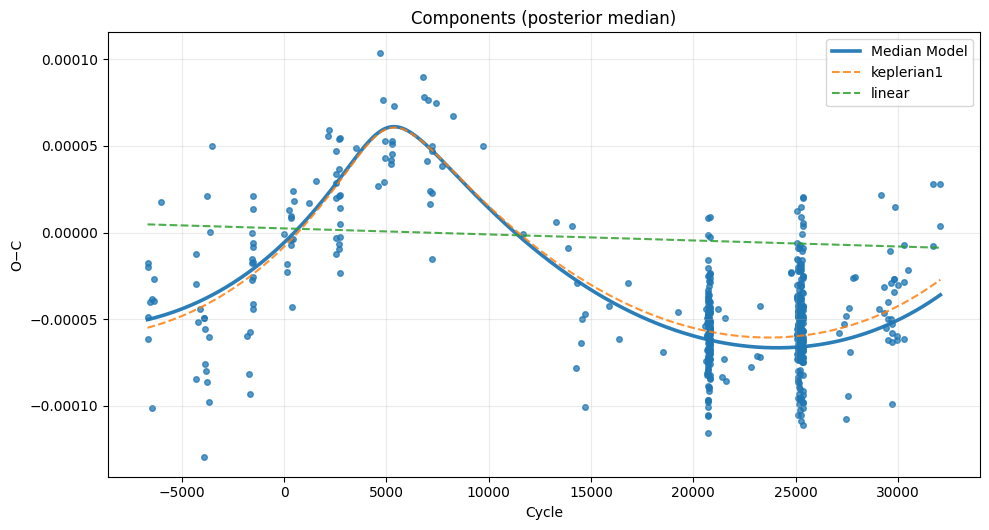

In [5]:
oc.fit_and_report(res)

c:\Users\bar1s\miniconda3\envs\ocpy\Lib\site-packages\arviz\plots\pairplot.py:229: UserWarning: Divergences data not found, plotting without divergences. Make sure the sample method provides divergences data and that it is present in the `diverging` field of `sample_stats` or `sample_stats_prior` or set divergences=False
  warnings.warn(


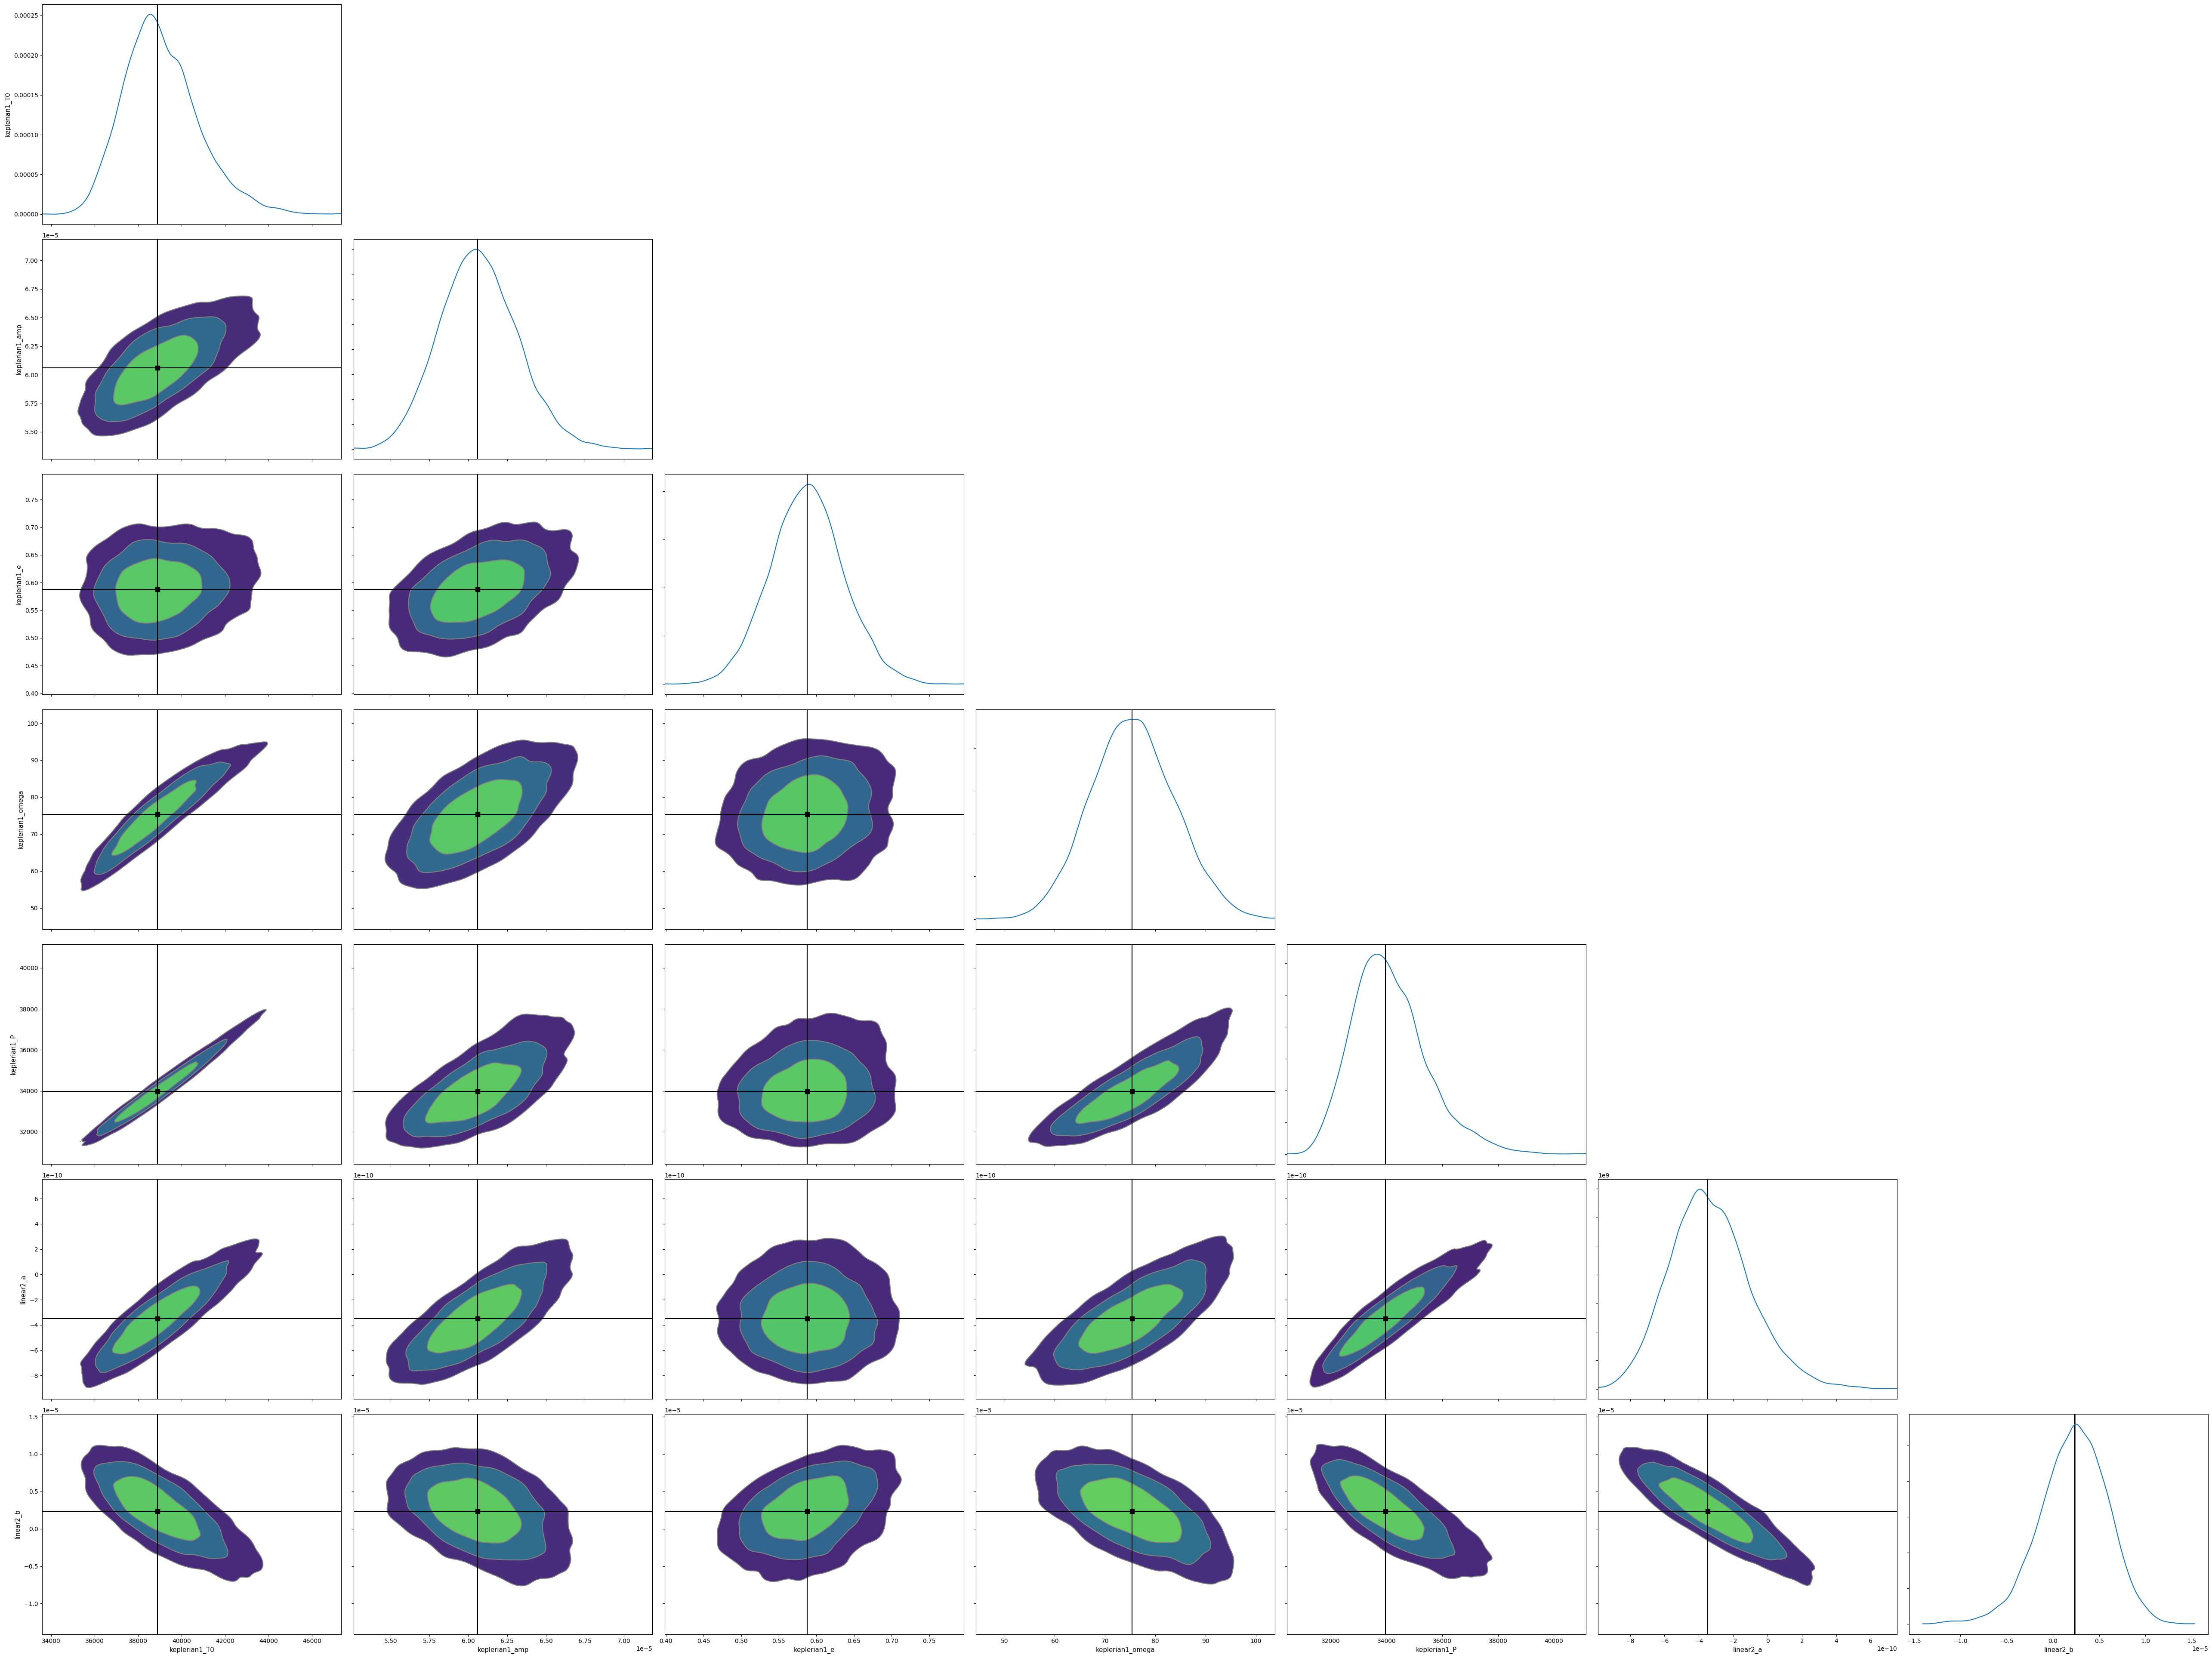

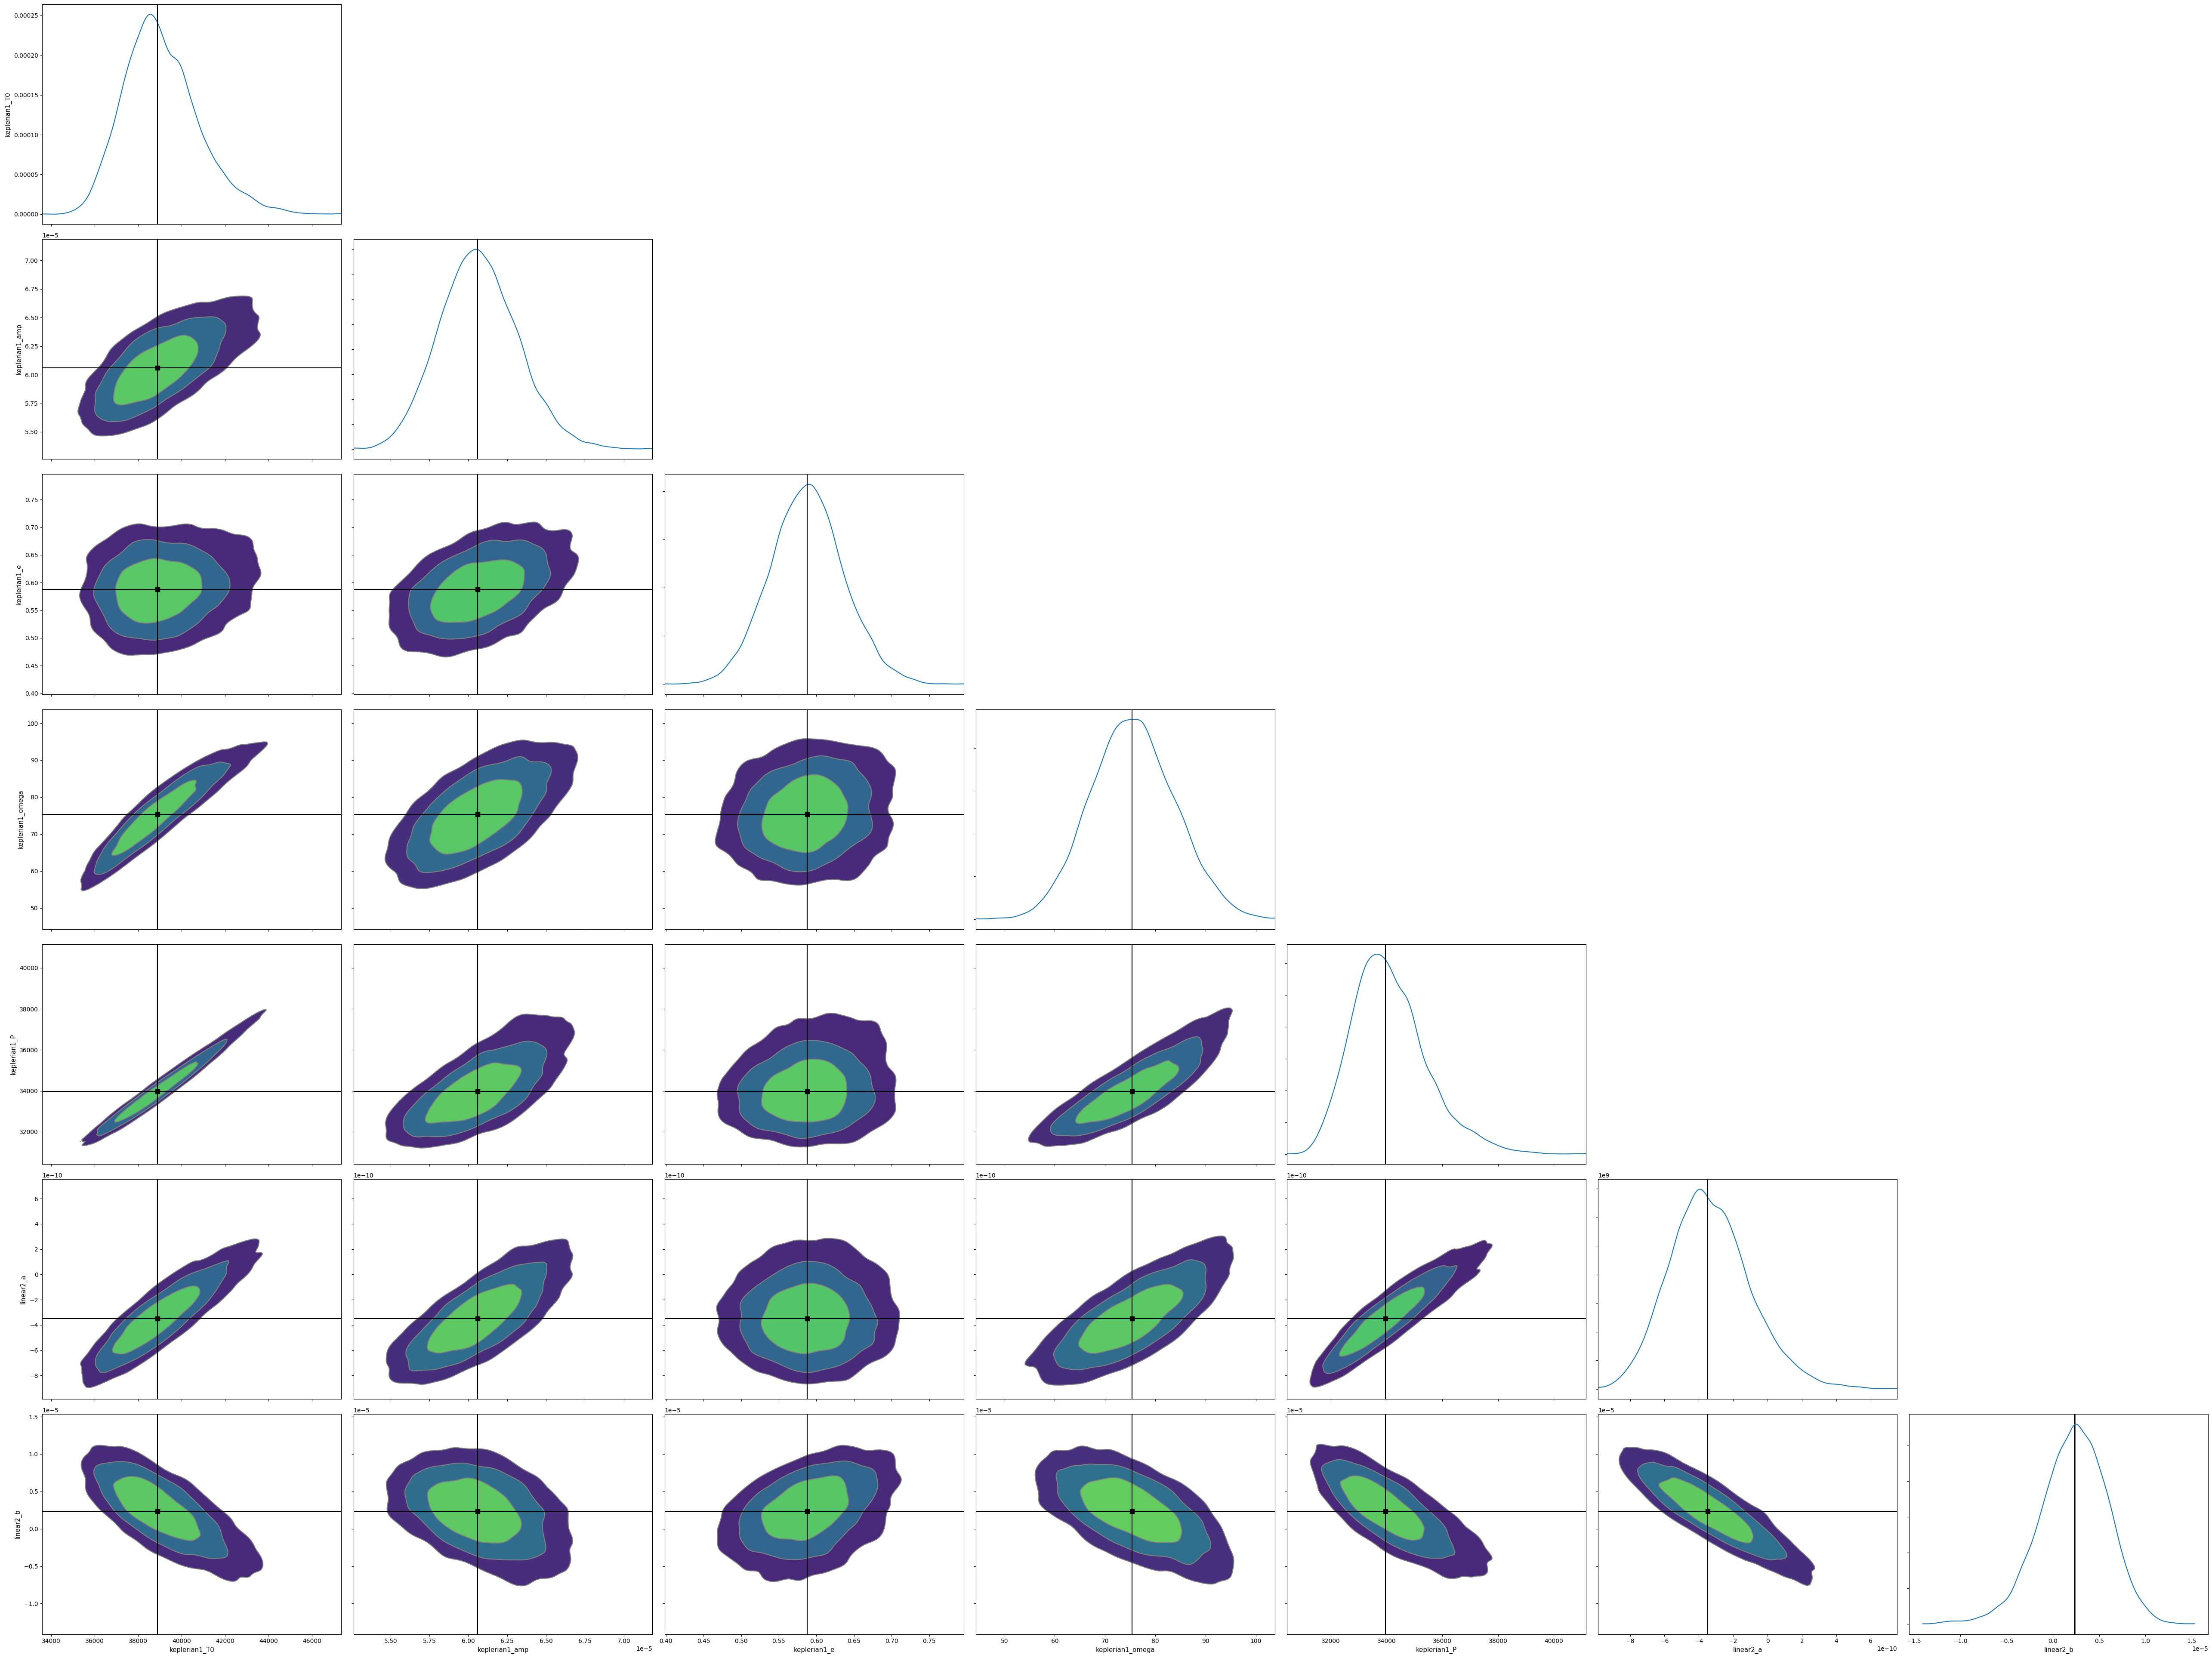

In [6]:
oc.create_corner_plot(res)

In [7]:
res.posterior.median()

<xarray.Dataset> Size: 64B
Dimensions:           ()
Data variables:
    keplerian1_T0     float64 8B 3.889e+04
    keplerian1_amp    float64 8B 6.059e-05
    keplerian1_e      float64 8B 0.5876
    keplerian1_omega  float64 8B 75.38
    keplerian1_P      float64 8B 3.396e+04
    linear2_a         float64 8B -3.475e-10
    linear2_b         float64 8B 2.373e-06
    y_model           float64 8B -6.223e-05
Attributes:
    created_at:                 2025-11-26T22:16:56.281257+00:00
    arviz_version:              0.22.0
    inference_library:          pymc
    inference_library_version:  5.26.1
    sampling_time:              232.79125237464905
    tuning_steps:               2000

In [ ]:
import numpy as np

y_model_posterior = res.posterior["y_model"]
y_model_median = y_model_posterior.median(dim=("chain", "draw")).values

y_obs = oc.data["oc"].to_numpy()
y_err = oc.data["minimum_time_error"].to_numpy()

chi2 = np.sum(((y_obs - y_model_median) / y_err) ** 2)

N = len(y_obs)

param_names = [v for v in res.posterior.data_vars if "y_model" not in v and "obs" not in v]
k = len(param_names)

red_chi2 = chi2 / (N - k)

print(f"Toplam Veri Sayısı (N): {N}")
print(f"Serbest Parametre Sayısı (k): {k}")
print("-" * 30)
print(f"Chi-Square (χ²): {chi2:.4f}")
print(f"Reduced Chi-Square (χ²_red): {red_chi2:.4f}")

Toplam Veri Sayısı (N): 470
Serbest Parametre Sayısı (k): 7
------------------------------
Chi-Square (χ²): 1410.5094
Reduced Chi-Square (χ²_red): 3.0465
